<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

Nota : este ejercicio está basado en https://www.statology.org/plot-multiple-roc-curves-python/

# Cargar Librerías

In [1]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

# Crear Datos Falsos

In [2]:
#A continuación, usaremos la función make_classification() de sklearn para crear un conjunto de datos falso con 1000 filas,
#cuatro variables predictoras y una variable de respuesta binaria:
#create fake dataset
X, y = datasets.make_classification(n_samples=1000,
                                    n_features=4,
                                    n_informative=3,
                                    n_redundant=1,
                                    random_state=0)

#split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

# Ajustar múltiples modelos y trazar curvas ROC

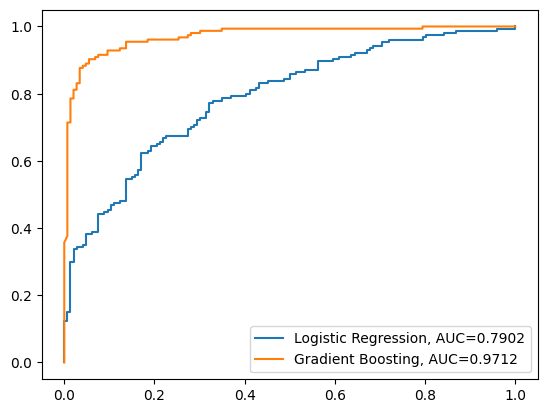

In [3]:
# A continuación, ajustaremos un modelo de regresión logística y luego un modelo gradient boosted
# y trazaremos la curva ROC para cada modelo en el mismo gráfico:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

In [4]:
# La línea azul muestra la curva ROC para el modelo de regresión logística y la línea naranja muestra la curva ROC
# para el modelo gradient boosted.

# Cuanto más se acerque una curva ROC a la esquina superior izquierda del gráfico, mejor será el modelo para
# clasificar los datos en categorías.

# Para cuantificar esto, podemos calcular el AUC (área bajo la curva), que nos dice el área que se encuentra debajo de la curva.

# Cuanto más cerca esté AUC de 1, mejor será el modelo.

# Desde nuestra gráfica podemos ver las siguientes métricas AUC para cada modelo:

# AUC del modelo de regresión logística: 0,7902
# AUC del modelo potenciado por gradiente: 0,9712
# Claramente, el modelo gradient boosted hace un mejor trabajo al clasificar los datos en categorías en comparación
# con el modelo de regresión logística.